## Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense,Dropout 
from keras.regularizers import  L1,L2 

## creating datapoints on the image with mouse click

In [2]:
dataset=[]
 
def draw(event,x,y,flag,param):
    if event==cv2.EVENT_FLAG_LBUTTON:
        dataset.append((x,y,0))
        cv2.circle(img,(x,y),4,(0,0,255),-1)
    elif event==cv2.EVENT_FLAG_RBUTTON:
        dataset.append((x,y,1))
        cv2.circle(img,(x,y),4,(0,255,0),-1) 

In [4]:
img=np.full((400,400,3),255,np.uint8)
cv2.namedWindow("window name",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("window name",draw)

while True:
    cv2.imshow("window name",img)
    if cv2.waitKey(1)&255==ord("q"):
        break 
cv2.destroyAllWindows() 

In [5]:
len(dataset) 

291

In [6]:
df=pd.DataFrame(dataset)

In [7]:
df 

,0,1,2
0,55,45,0
1,55,35,0
2,67,41,0
3,63,60,0
4,77,52,0
...,...,...,...
286,276,196,1
287,273,215,1
288,138,268,1
289,157,273,1


In [8]:
df.iloc[:,2].value_counts()

2
0    188
1    103
Name: count, dtype: int64

## saving the data to a csv file

In [9]:
# df.to_csv("data_points.csv",index=False)

## Import the csv file 

In [10]:
df=pd.read_csv("data_points.csv")
df.head() 

,0,1,2
0,55,45,0
1,55,35,0
2,67,41,0
3,63,60,0
4,77,52,0


## splitting into input and output features

In [11]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)

## splitting the data into train and test 

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) 

## Standardizing the input features

In [13]:
std=StandardScaler()
X_train=std.fit_transform(x_train)
X_test=std.transform(x_test) 

## creating the logical structure

In [14]:
model=Sequential()
model.add(Dense(8,activation="relu",input_dim=2)) 
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [15]:
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 85 (340.00 Byte)
Trainable params: 85 (340.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## compiling the model

In [16]:
from keras.optimizers import SGD 

In [17]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(X_train,y_train,batch_size=10,epochs=50,validation_split=0.1)

Epoch 1/50
24/24 [==============================] - 2s 17ms/step - loss: 0.8149 - accuracy: 0.2650 - val_loss: 0.7873 - val_accuracy: 0.2222
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 0.7688 - accuracy: 0.1709 - val_loss: 0.7500 - val_accuracy: 0.2593
Epoch 3/50
24/24 [==============================] - 0s 6ms/step - loss: 0.7349 - accuracy: 0.1838 - val_loss: 0.7207 - val_accuracy: 0.2963
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 0.7080 - accuracy: 0.4402 - val_loss: 0.6980 - val_accuracy: 0.5185
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6884 - accuracy: 0.5684 - val_loss: 0.6808 - val_accuracy: 0.5926
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6726 - accuracy: 0.6026 - val_loss: 0.6659 - val_accuracy: 0.5926
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6590 - accuracy: 0.6239 - val_loss: 0.6536 - val_accuracy: 0.6296
Epoch 8/50
24/24 [=

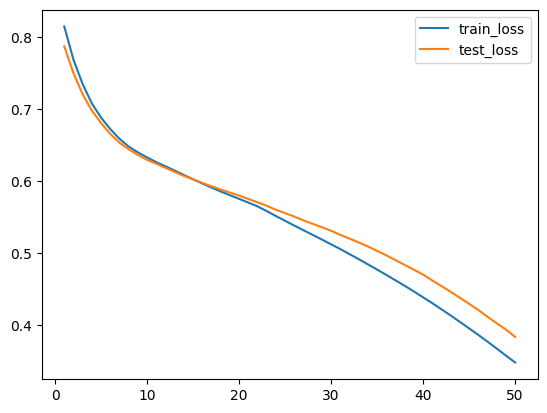

In [18]:
plt.plot(range(1,51),history.history["loss"],label="train_loss")
plt.plot(range(1,51),history.history["val_loss"],label="test_loss") 
plt.legend()  

## make predictions using the model

In [19]:
predicted=model.predict(X_test)
predicted 

1/1 [==============================] - 0s 136ms/step


array([[0.5158577 ],
       [0.02661472],
       [0.270528  ],
       [0.31978482],
       [0.2490447 ],
       [0.44048953],
       [0.33094668],
       [0.476996  ],
       [0.01920812],
       [0.50688255],
       [0.17606209],
       [0.06649718],
       [0.04067171],
       [0.2916692 ],
       [0.33101845],
       [0.26631212],
       [0.06599766],
       [0.09767767],
       [0.6455757 ],
       [0.7083472 ],
       [0.46043488],
       [0.59208417],
       [0.24836728],
       [0.15486436],
       [0.47390008],
       [0.5264235 ],
       [0.3501224 ],
       [0.20251274],
       [0.02743526],
       [0.66575396]], dtype=float32)

In [20]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1]])

## evaluating the model

0.9333333333333333


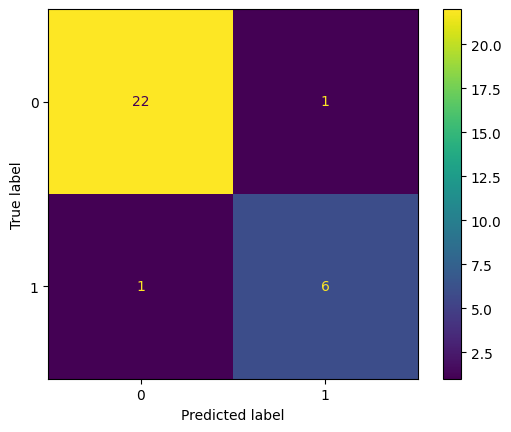

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 
 

## plotting the decision surface

In [22]:
from mlxtend.plotting  import plot_decision_regions 

9600/9600 [==============================] - 21s 2ms/step


<Axes: >

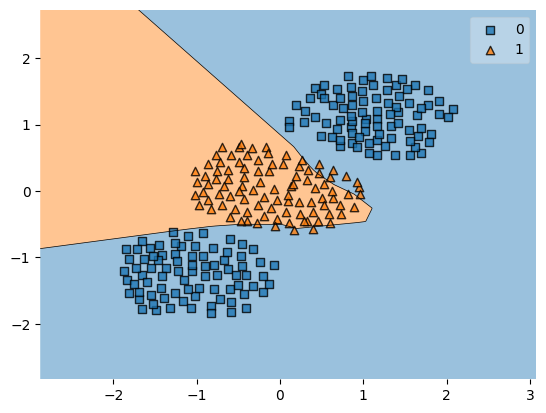

In [23]:
plot_decision_regions(X_train,y_train.values,clf=model) 

9600/9600 [==============================] - 20s 2ms/step


<Axes: >

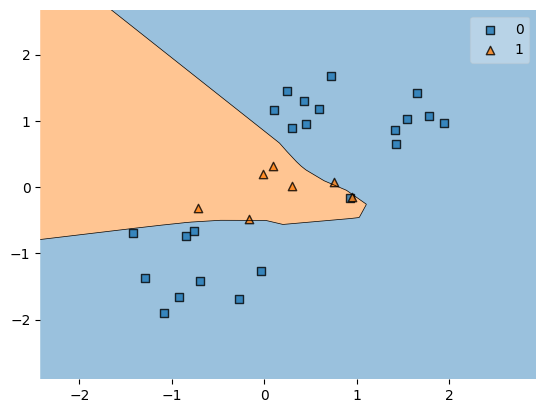

In [24]:
#for test data 
plot_decision_regions(X_test,y_test.values,clf=model) 

## Conclusions:

###### This neural network model achieves an accuracy of 93%. The model architecture consists of 2 hidden layers with the following specifications:

- In the first hidden layer, there are 8 neurons with the ReLU activation function.
- In the second hidden layer, there are 6 neurons with the ReLU activation function.


###### The output layer uses the sigmoid activation function.

##### For model compilation, the following settings were used:

###### Loss function: Binary cross-entropy.
- Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 5 and a learning rate of 0.01.
- The model was trained for 50 epochs.

###### Overall, this neural network model architecture and training configuration achieve an accuracy of 93%.  